# CHANGE VECTOR ANALYSIS IN POSTERIOR PROBABILITY SPACE

In [1]:
import ee
import os
import pathlib
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import pandas as pd

from dotenv import load_dotenv
from skimage.morphology import remove_small_objects
from utils import download_composite, threshold_optimization, change_type_discrimination
from sklearn.metrics import jaccard_score, f1_score, precision_score, recall_score, cohen_kappa_score

## Initialize Google Earth Engine API

In [2]:
NOTEBOOK_DIR = os.getcwd()

# Get the project root directory (two levels up)
PROJECT_ROOT = os.path.abspath(os.path.join(NOTEBOOK_DIR, '../..'))

# Load environment variables
load_dotenv()

# Get credentials path and ensure it's relative to PROJECT_ROOT
GEE_CREDENTIALS_PATH = os.path.join(PROJECT_ROOT, os.getenv('GEE_CREDENTIALS_PATH'))
GEE_PROJECT_ID = os.getenv('GEE_PROJECT_ID')

# Initialize GEE
credentials = ee.ServiceAccountCredentials(
    '',
    GEE_CREDENTIALS_PATH,
    GEE_PROJECT_ID
)
ee.Initialize(credentials, opt_url="https://earthengine-highvolume.googleapis.com")

## Download S2 images and Dynamic Land Cover Map

In [3]:
# Define the table as a DataFrame
data = {
    'year_t1': [2019, 2020, 2021, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
    'start_month_t1': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'end_month_t1': [4, 12, 12, 12, 4, 4, 12, 12, 4, 12],
    'year_t2': [2020, 2021, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
    'start_month_t2': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'end_month_t2': [4, 12, 12, 12, 4, 4, 12, 12, 4, 12],
    'lat': [-31.6850, -32.4835, -30.3741, -31.9233, -31.1271, -30.7706, -30.7543, -30.0826, -30.6478, -31.0180],
    'lon': [-65.0744, -64.7550, -63.3914, -65.5875, -65.0787, -65.6558, -65.4547, -63.5801, -65.3328, -65.0793],
    'id': ['0016', '0049', '0073', '0101', '0107', '0116_1', '0116', '0137', '0139_1', '0139']
}

df = pd.DataFrame(data)

# Iterate over the rows of the DataFrame and call download_composite
for index, row in df.iterrows():
    lat = row['lat']
    lon = row['lon']
    start_date1 = f"{row['year_t1']}-{str(row['start_month_t1']).zfill(2)}-01"
    end_date1 = f"{row['year_t1']}-{str(row['end_month_t1']).zfill(2)}-30"
    start_date2 = f"{row['year_t2']}-{str(row['start_month_t2']).zfill(2)}-01"
    end_date2 = f"{row['year_t2']}-{str(row['end_month_t2']).zfill(2)}-30"
    id = row['id']
    
    # Download composite for T1
    download_composite(lat, lon, f"./testData/dw_t1/{id}.tif", 512, 10, start_date1, end_date1, 0.6, 'DYNAMIC_WORLD')
    
    # Download composite for T2
    download_composite(lat, lon, f"./testData/dw_t2/{id}.tif", 512, 10, start_date2, end_date2, 0.6, 'DYNAMIC_WORLD')

    print(f"[{index + 1}/{len(df)}] Downloaded composite for {id}")

Dynamic World available images: 53
Image saved in testData/dw_t1/0016.tif
Dynamic World available images: 66
Image saved in testData/dw_t2/0016.tif
[1/10] Downloaded composite for 0016
Dynamic World available images: 98
Image saved in testData/dw_t1/0049.tif
Dynamic World available images: 91
Image saved in testData/dw_t2/0049.tif
[2/10] Downloaded composite for 0049
Dynamic World available images: 47
Image saved in testData/dw_t1/0073.tif
Dynamic World available images: 62
Image saved in testData/dw_t2/0073.tif
[3/10] Downloaded composite for 0073
Dynamic World available images: 45
Image saved in testData/dw_t1/0101.tif
Dynamic World available images: 44
Image saved in testData/dw_t2/0101.tif
[4/10] Downloaded composite for 0101
Dynamic World available images: 40
Image saved in testData/dw_t1/0107.tif
Dynamic World available images: 32
Image saved in testData/dw_t2/0107.tif
[5/10] Downloaded composite for 0107
Dynamic World available images: 38
Image saved in testData/dw_t1/0116_1.tif

## Testing the Change Vector Analysis

Best threshold: 0.2217261780070645


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0936..2.0424].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1059..2.0952].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1059..2.0952].


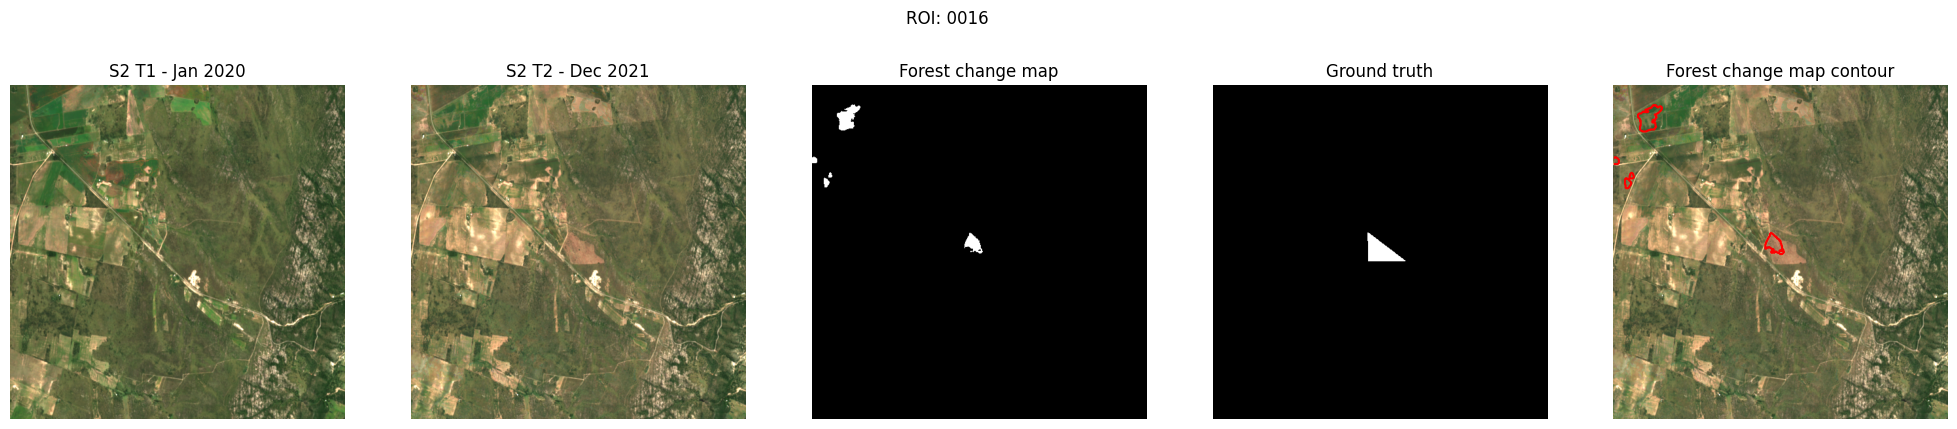

Best threshold: 0.3019711118716598


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0546..1.722].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0658..1.4532].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0658..1.4532].


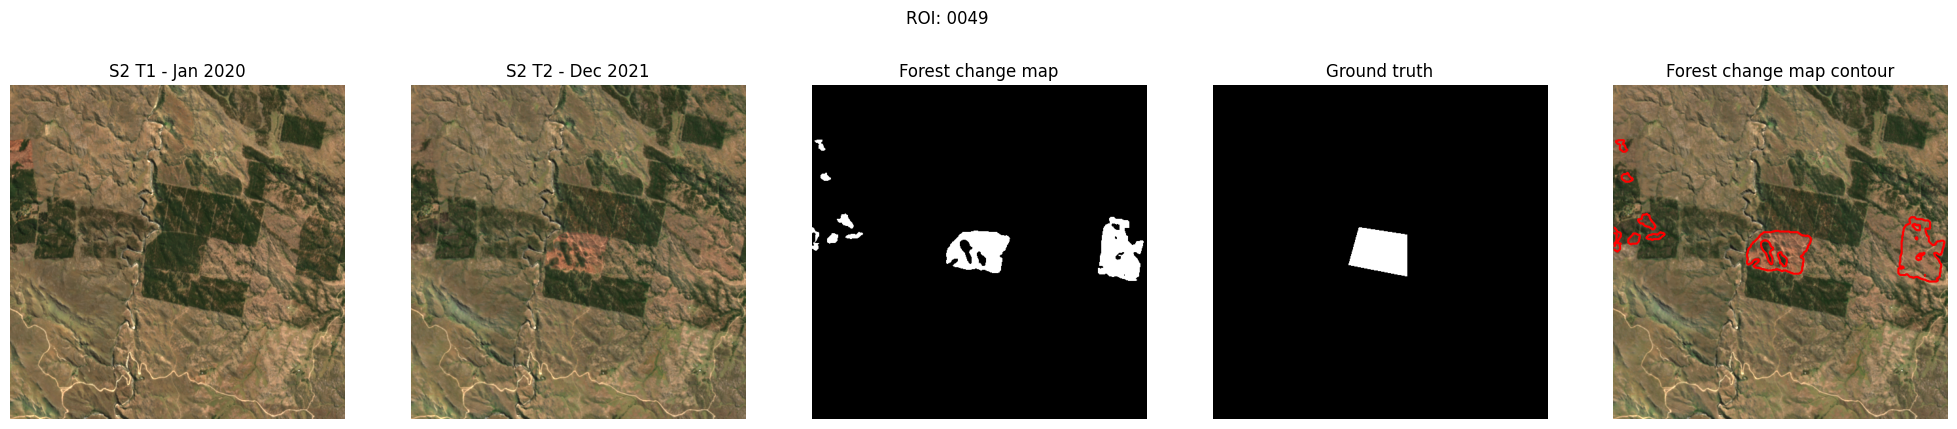

Best threshold: 0.22162628498064477


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1341..2.8968].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1767..2.4708].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1767..2.4708].


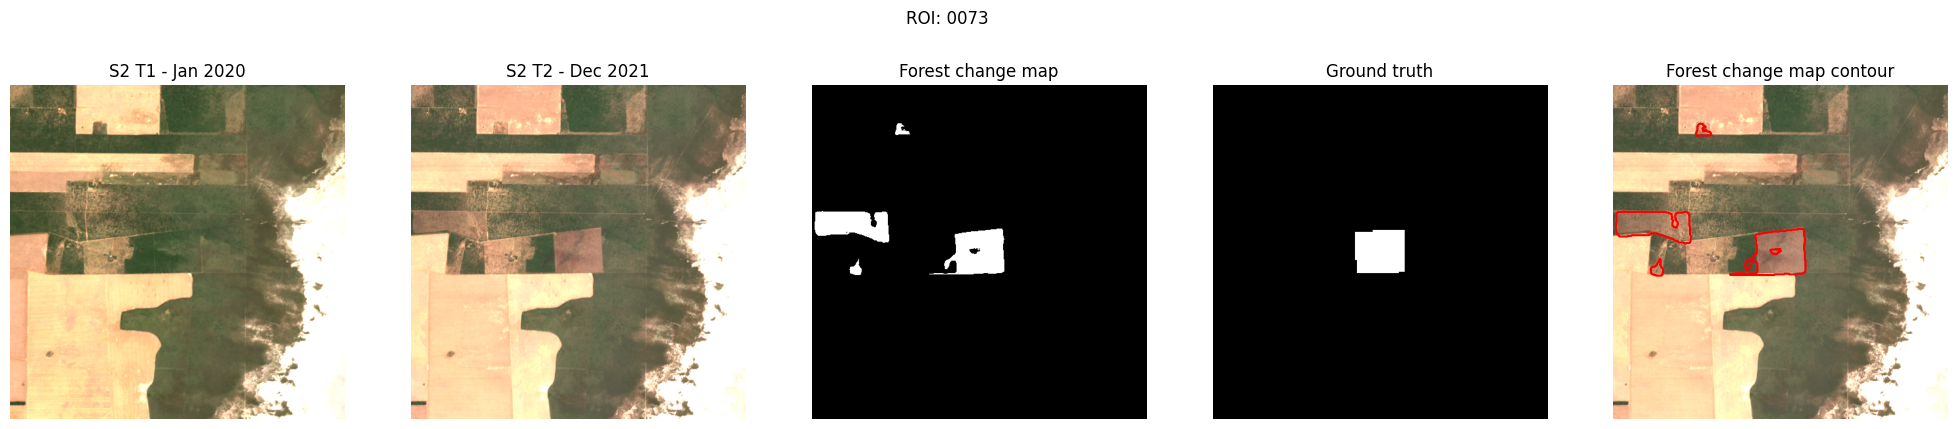

Best threshold: 0.3218287550309652


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1662..1.944].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1464..1.9104].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1464..1.9104].


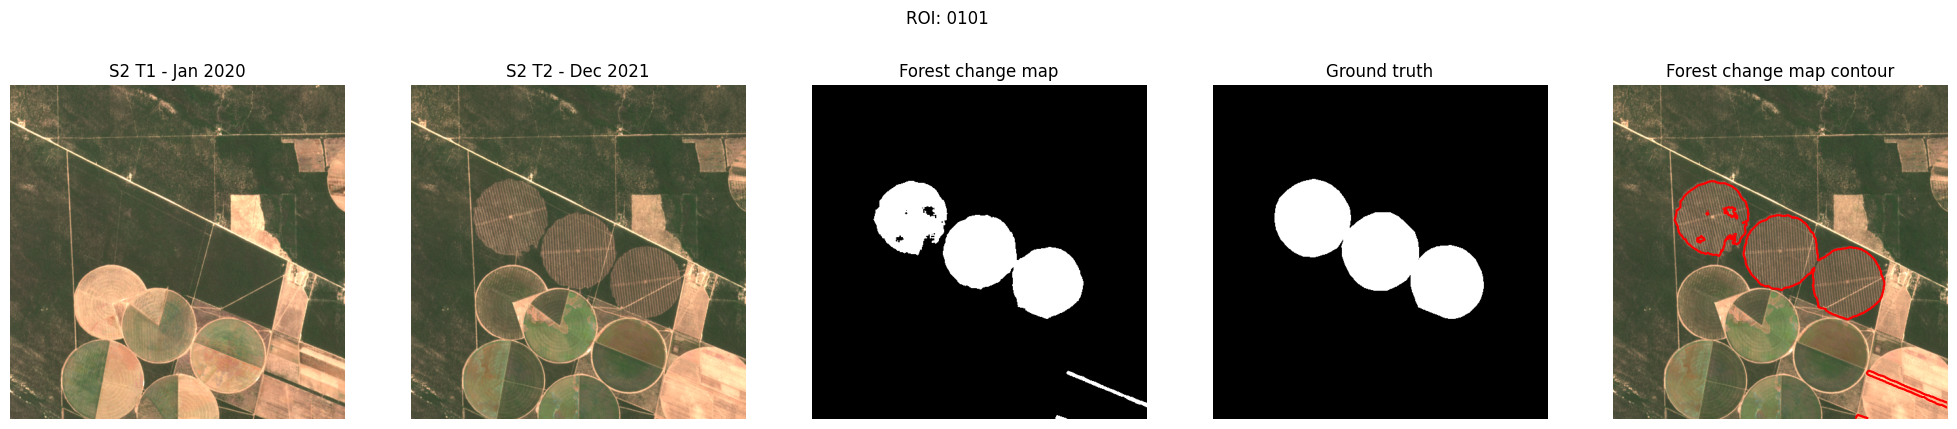

Best threshold: 0.3025095638918337


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1023..1.7826].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.108..1.6848].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.108..1.6848].


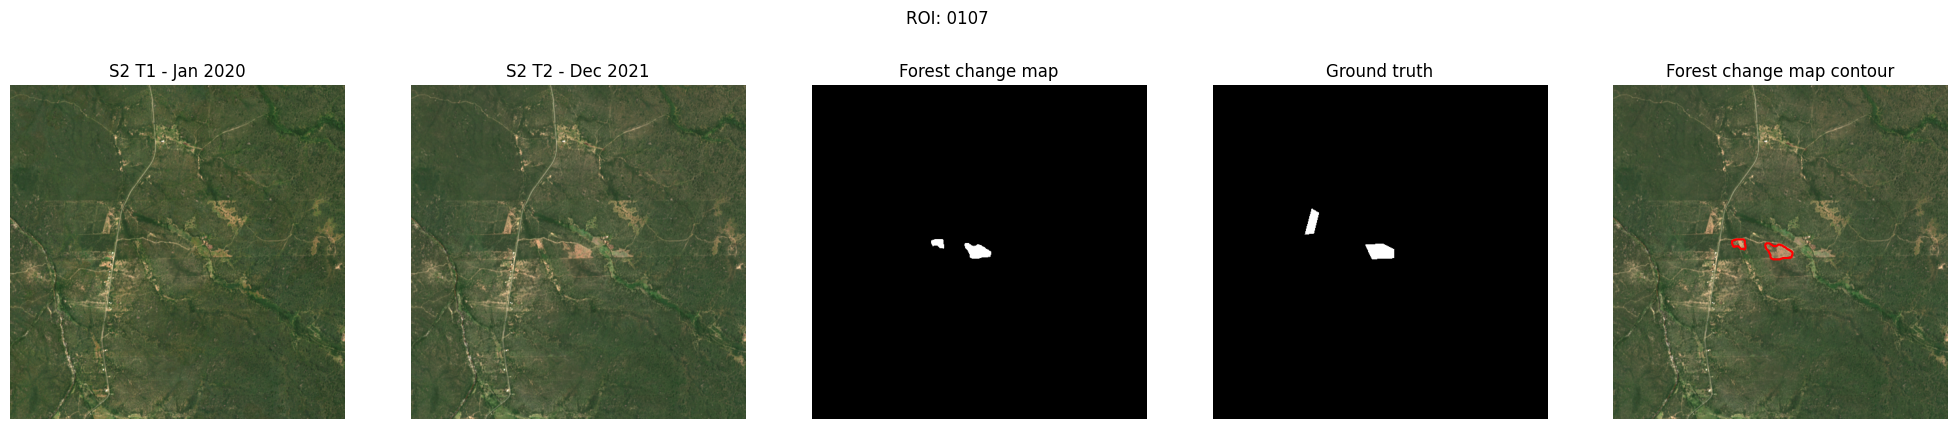

Best threshold: 0.22067760370612294


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.2026..1.764].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1858..1.5882].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1858..1.5882].


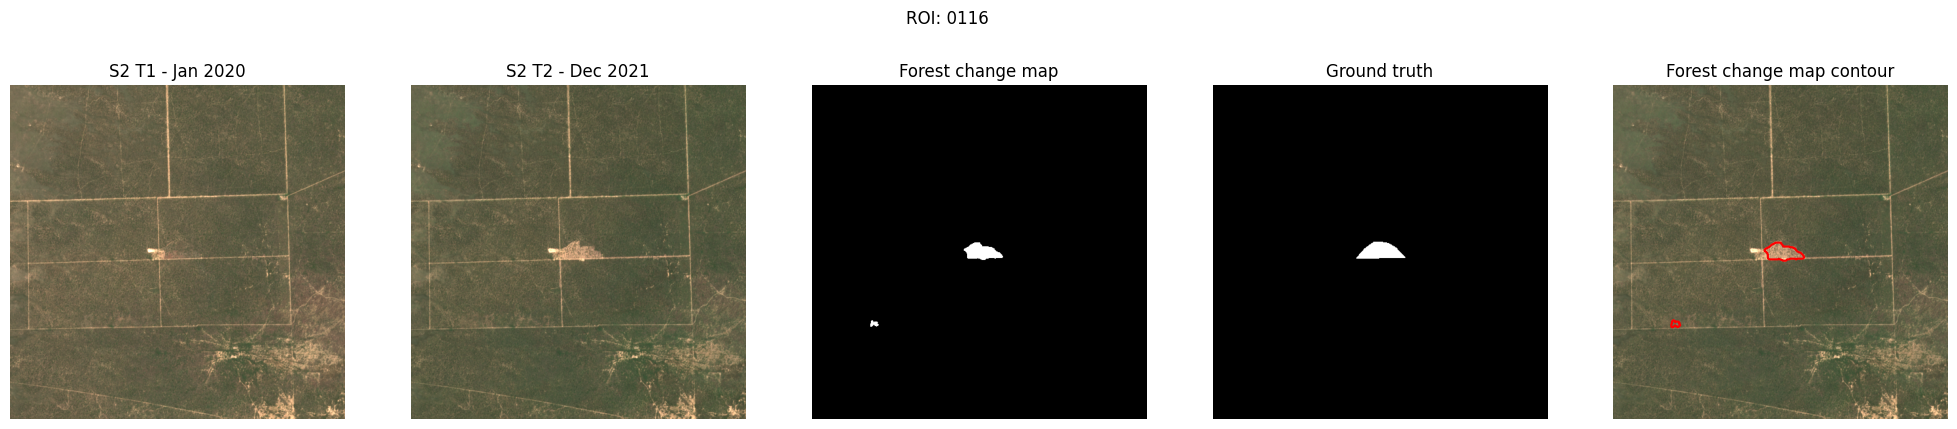

Best threshold: 0.222547473210494


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.186..1.6368].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1992..1.6092].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1992..1.6092].


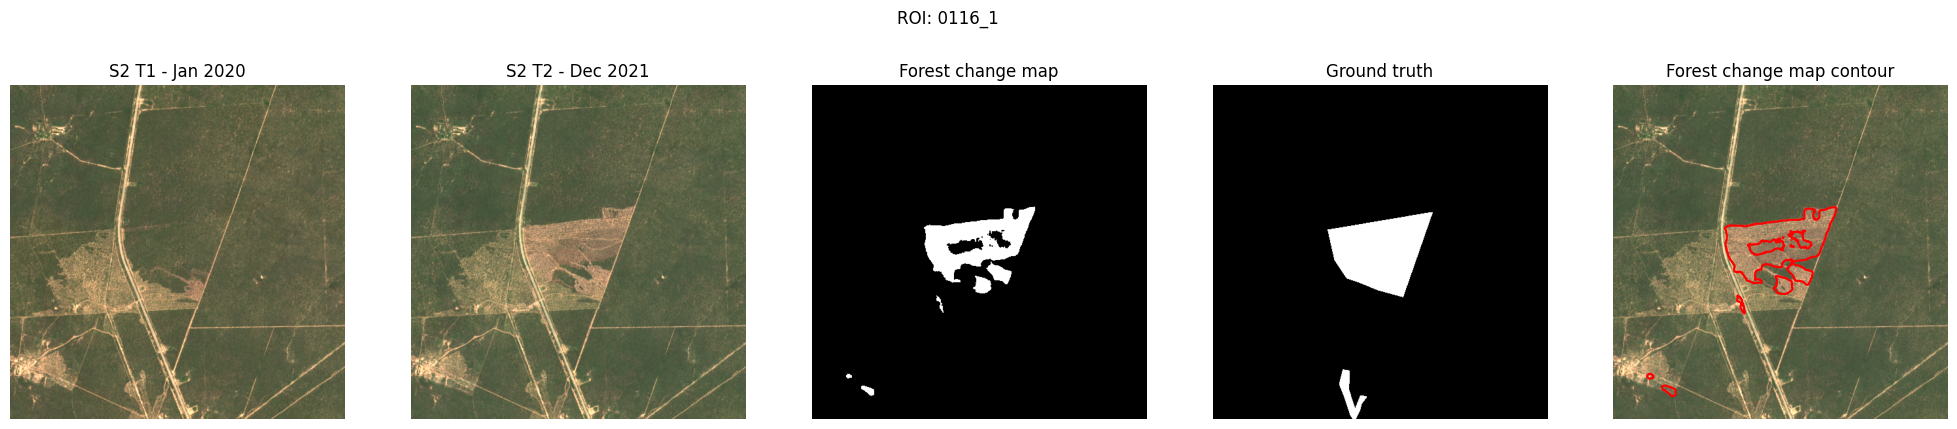

Best threshold: 0.3431448478331361


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1908..1.914].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1704..2.5632].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1704..2.5632].


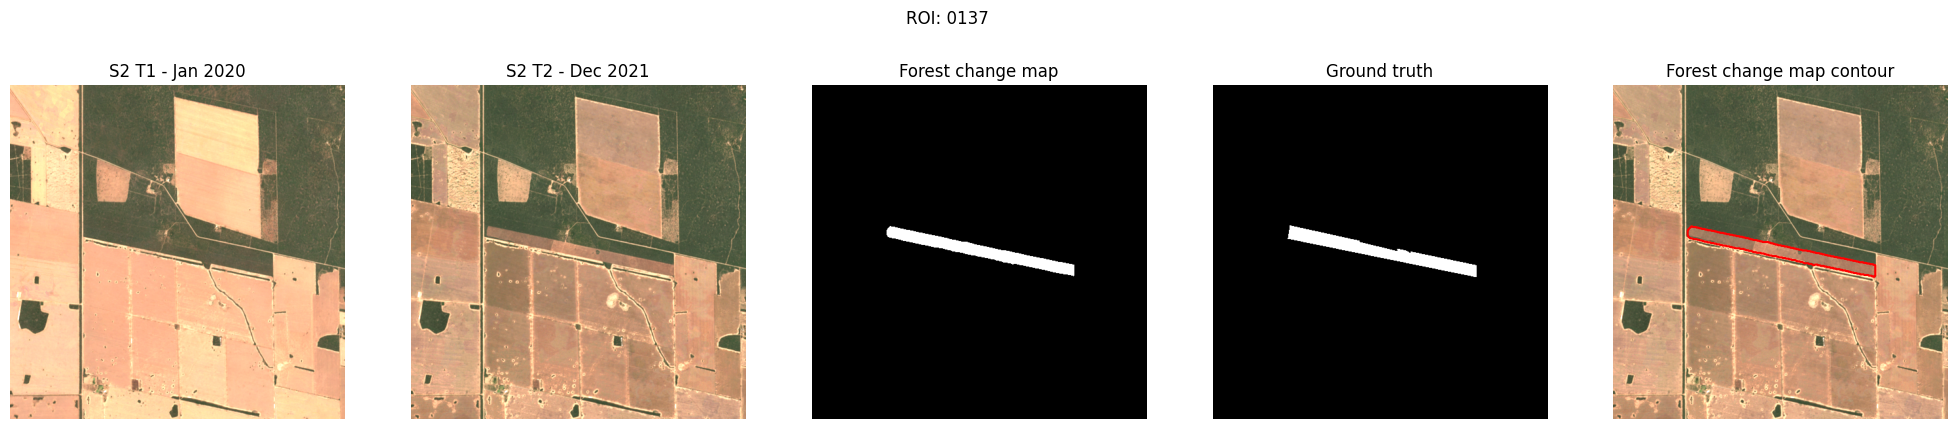

Best threshold: 0.1814121972012212


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.13122857142857142..2.6352].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1206..2.2608].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1206..2.2608].


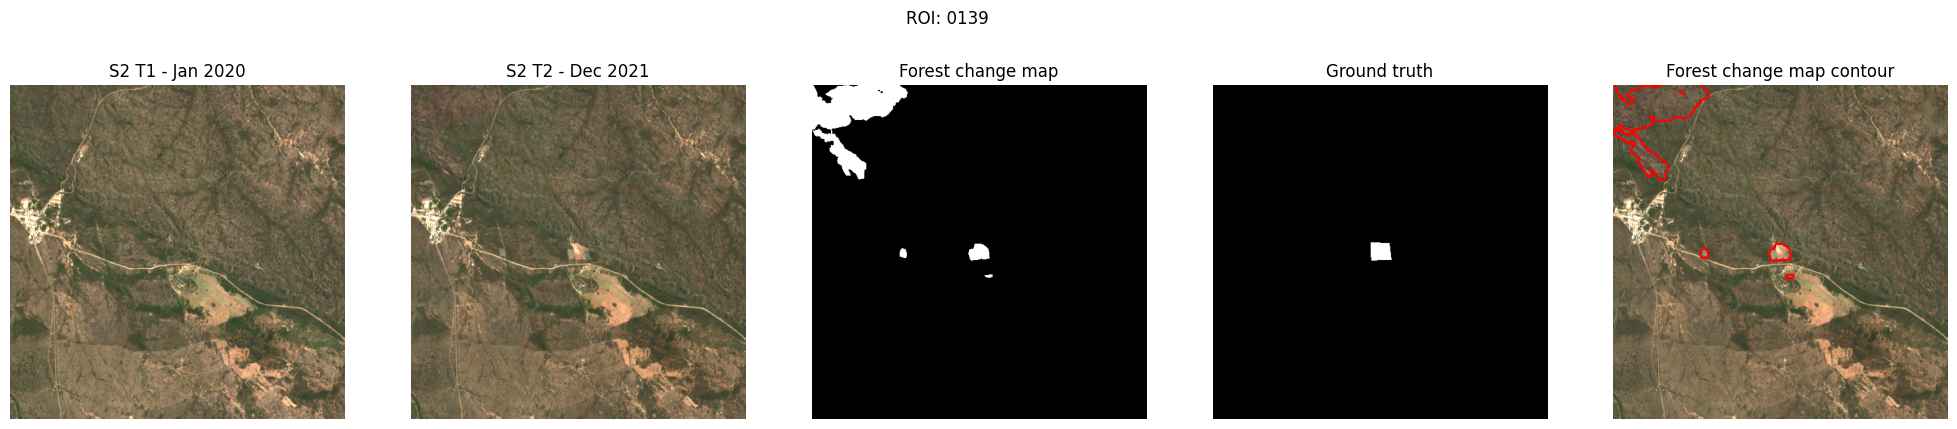

Best threshold: 0.18276079812742121


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.117..2.472].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1218..2.4144].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1218..2.4144].


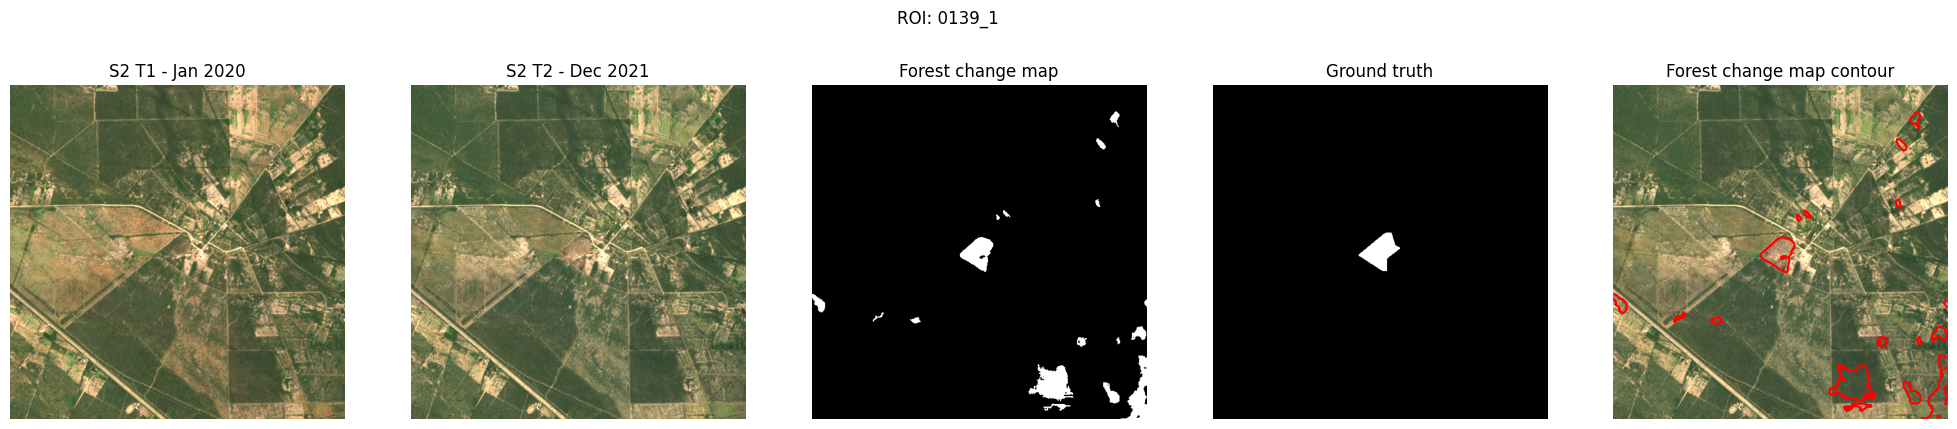

{'ROI': '0016', 'IoU': 0.17042606516290726, 'F1': 0.291220556745182, 'Precision': 0.27474747474747474, 'Recall': 0.3097949886104784, 'Kappa': 0.287425972843261}
{'ROI': '0049', 'IoU': 0.3528225806451613, 'F1': 0.5216095380029806, 'Precision': 0.4002079002079002, 'Recall': 0.7487359004278491, 'Kappa': 0.509058437193157}
{'ROI': '0073', 'IoU': 0.4712584684869637, 'F1': 0.640619549291844, 'Precision': 0.4844871253693542, 'Recall': 0.9452336833436278, 'Kappa': 0.631594017455713}
{'ROI': '0101', 'IoU': 0.856049146420523, 'F1': 0.9224423265638774, 'Precision': 0.9711083873227105, 'Recall': 0.8784211860111505, 'Kappa': 0.9124248182725894}
{'ROI': '0107', 'IoU': 0.40847784200385356, 'F1': 0.5800273597811217, 'Precision': 0.7327188940092166, 'Recall': 0.48, 'Kappa': 0.5783402271863466}
{'ROI': '0116', 'IoU': 0.6850174216027874, 'F1': 0.8130686517783292, 'Precision': 0.8920145190562614, 'Recall': 0.7469604863221885, 'Kappa': 0.8122093509628814}
{'ROI': '0116_1', 'IoU': 0.59030387972224, 'F1': 0.

In [4]:
# Set up the list to store the metrics
metrics_list = []

# Load the images paths
t1_files = sorted(list(pathlib.Path("./testData/t1").rglob("*.tif")))
t2_files = sorted(list(pathlib.Path("./testData/t2").rglob("*.tif")))
dw_t1_files = sorted(list(pathlib.Path("./testData/dw_t1").rglob("*.tif")))
dw_t2_files = sorted(list(pathlib.Path("./testData/dw_t2").rglob("*.tif")))
gt_files = sorted(list(pathlib.Path("./testData/gt").rglob("*.tif")))


# Iterate over the images
for i, (t1_file, t2_file, dw_t1_file, dw_t2_file, gt_file) in enumerate(zip(t1_files, t2_files, dw_t1_files, dw_t2_files, gt_files)):
    ## T1 and T2 input image
    with rasterio.open(t1_file) as src1, rasterio.open(t2_file) as src2, \
        rasterio.open(gt_file) as src3, rasterio.open(dw_t1_file) as src4, \
        rasterio.open(dw_t2_file) as src5:
        s2_t1 = src1.read() 
        s2_t2 = src2.read() 
        dw_t1 = src4.read()
        dw_t2 = src5.read()
        gt_image = src3.read(1)

    # Change vector of probabilities (for each pixel in each probability class)
    delta_prob = dw_t2 - dw_t1  # shape: (9, height, width)

    # Vector change magnitude: Euclidean norm in axis 0 (bands)
    # magnitude[i, j] = sqrt( sum( (delta_prob[:, i, j])^2 ) ) 
    magnitude = np.sqrt(np.sum(delta_prob**2, axis=0))  # shape: (height, width)

    # Get the labels for each pixel
    labels_t1 = np.argmax(dw_t1, axis=0)
    labels_t2 = np.argmax(dw_t2, axis=0)

    # Threshold optimization
    best_thr, best_Lk = threshold_optimization(
            magnitude,
            labels_t1,
            labels_t2,
            step_coarse=0.1,
            step_fine=0.02,
            tolerance=1e-10,
            max_iterations=50
        )

    print(f"Best threshold: {best_thr}")

    changed_mask = (magnitude >= best_thr)

    # Discriminate change types
    change_map = change_type_discrimination(dw_t1, dw_t2, changed_mask, 9)

    # Get the forest change map (forest / 1 -> other values n = 1 * 100 + n)
    forest_change = (change_map >= 100) & (change_map <= 200)

    # Post process (clean small areas)
    forest_change_cleaned = remove_small_objects(forest_change.astype(bool), min_size=32)


    # Calculate the metrics
    iou = jaccard_score(gt_image.flatten(), forest_change_cleaned.flatten())
    f1 = f1_score(gt_image.flatten(), forest_change_cleaned.flatten())
    precision = precision_score(gt_image.flatten(), forest_change_cleaned.flatten())
    recall = recall_score(gt_image.flatten(), forest_change_cleaned.flatten())
    kappa = cohen_kappa_score(gt_image.flatten(), forest_change_cleaned.flatten())

    # Save the metrics in the list
    metrics_list.append({
        "ROI": t1_file.stem,
        "IoU": iou,
        "F1": f1,
        "Precision": precision,
        "Recall": recall,
        "Kappa": kappa
    })


    ## Plot the results
    fig, axs = plt.subplots(1, 5, figsize=(25, 5))
    axs[0].imshow((s2_t1[[2, 1, 0]] * 6 / 10000).transpose(1, 2, 0))
    axs[0].set_title("S2 T1 - Jan 2020")

    axs[1].imshow((s2_t2[[2, 1, 0]] * 6 / 10000).transpose(1, 2, 0))
    axs[1].set_title("S2 T2 - Dec 2021")

    axs[2].imshow(forest_change_cleaned, cmap="gray")
    axs[2].set_title("Forest change map")

    axs[3].imshow(gt_image, cmap="gray")
    axs[3].set_title("Ground truth")

    axs[4].contour(forest_change_cleaned, levels=[0.2], colors="red")
    axs[4].imshow((s2_t2[[2, 1, 0]] * 6 / 10000).transpose(1, 2, 0))
    axs[4].set_title("Forest change map contour")

    for ax in axs.flat:
        ax.axis("off")

    plt.suptitle(f"ROI: {t1_file.stem}")
    plt.show()


# Show the metrics
for metrics in metrics_list:
    print(metrics)

### Get the summary of metrics

In [5]:
# Initialize the dictionary to store the sum of the metrics
sum_metrics = {'IoU': 0, 'F1': 0, 'Precision': 0, 'Recall': 0, 'Kappa': 0}

# Sum the metrics
for metrics in metrics_list:
    sum_metrics['IoU'] += metrics['IoU']
    sum_metrics['F1'] += metrics['F1']
    sum_metrics['Precision'] += metrics['Precision']
    sum_metrics['Recall'] += metrics['Recall']
    sum_metrics['Kappa'] += metrics['Kappa']

# Calculate the average of the metrics
num_metrics = len(metrics_list)
avg_metrics = {key: round(value / num_metrics, 3) for key, value in sum_metrics.items()}

# Show the average of the metrics
print("Average metrics:")
for key, value in avg_metrics.items():
    print(f"{key}: {value}")

Average metrics:
IoU: 0.466
F1: 0.589
Precision: 0.585
Recall: 0.723
Kappa: 0.582


### Bibliography

```
@ARTICLE{5597922,
  author={Chen, Jin and Chen, Xuehong and Cui, Xihong and Chen, Jun},
  journal={IEEE Geoscience and Remote Sensing Letters}, 
  title={Change Vector Analysis in Posterior Probability Space: A New Method for Land Cover Change Detection}, 
  year={2011},
  volume={8},
  number={2},
  pages={317-321},
  keywords={Remote sensing;Pixel;Radiometry;Accuracy;Training;Satellites;Earth;Change vector analysis (CVA);land cover change;postclassification comparison (PCC);posterior probability space},
  doi={10.1109/LGRS.2010.2068537}}

```